## This notebook contains learning materials about processing spatial data in python.

### Re-project vector data
The objectives of this section is to learn how to:- 
- Identify a CRS of a spatial dataset and reproject it to another CRS in python.
- Clip a spatial vector point and line layer to the spatial extent of the polygon layer.
- Dissolve polygons based upon an attribute.
- Join spatial attributes from one shapefile to another in python.

In [11]:
# importing the libraries 
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
sns.set(font_scale=1.5)

In [4]:
# checking CRS of two datasets
sjer_roads = gpd.read_file("C:/Users/Juliance/Desktop/Earth_DS/spatial-vector-lidar/california/madera-county-roads/tl_2013_06039_roads.shp")
sjer_aoi = gpd.read_file("C:/Users/Juliance/Desktop/Earth_DS/spatial-vector-lidar/california/neon-sjer-site/vector_data/SJER_crop.shp")

In [5]:
# viewing the coordinate reference system for both layers
print(sjer_roads.crs)
print(sjer_aoi.crs)

epsg:4269
epsg:32611


In [8]:
sjer_aoi.head()

Id                                           geometry
0   0  POLYGON ((254570.567 4112361.920, 258867.409 4...

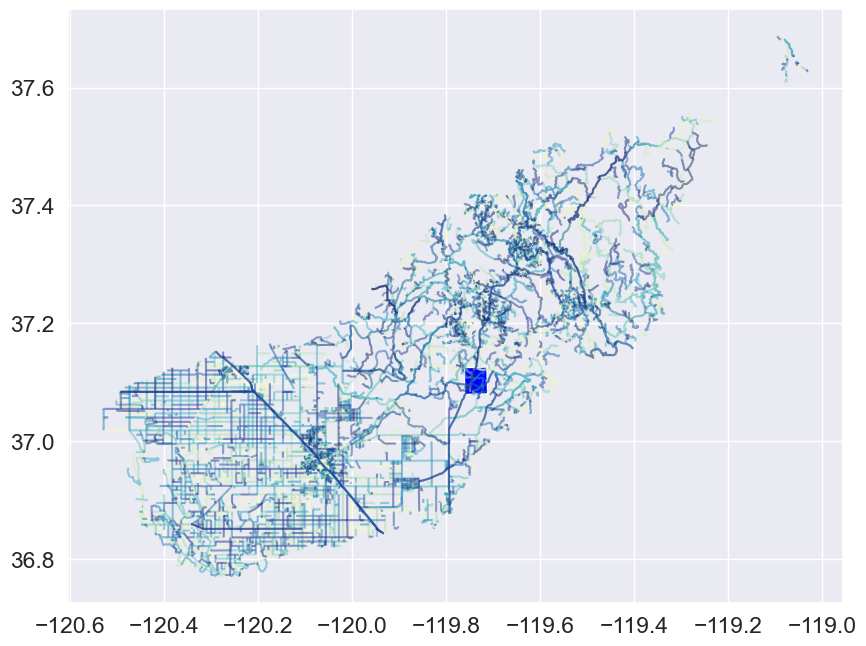

In [13]:
# reprojecting all data to epsg = 4269
sjer_aoi_wgs = sjer_aoi.to_crs(epsg=4269)

# plot the data
fig, ax = plt.subplots(figsize=(10,10))

sjer_roads.plot(cmap='Greys',ax=ax,alpha=.5)
sjer_aoi_wgs.plot(ax=ax, markersize=10, color='blue')

plt.show()

In [16]:
# reprojection using US census data
state_bound = gpd.read_file("C:/Users/Juliance/Desktop/Earth_DS/spatial-vector-lidar/usa/usa-states-census-2014.shp")

# checking the type
print(type(state_bound))

# viewing the head of the dataset
state_bound.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0      06  01779778  0400000US06    06     CA            California   00   
1      11  01702382  0400000US11    11     DC  District of Columbia   00   
2      12  00294478  0400000US12    12     FL               Florida   00   
3      13  01705317  0400000US13    13     GA               Georgia   00   
4      16  01779783  0400000US16    16     ID                 Idaho   00   

          ALAND       AWATER     region  \
0  403483823181  20483271881       West   
1     158350578     18633500  Northeast   
2  138903200855  31407883551  Southeast   
3  148963503399   4947080103  Southeast   
4  214045425549   2397728105       West   

                                            geometry  
0  MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...  
1  POLYGON Z ((-77.11976 38.93434 0.00000, -77.04...  
2  MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...  
3  POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...  
4  POLYGON Z ((-117.24303 44.39097 0.00000, -117....

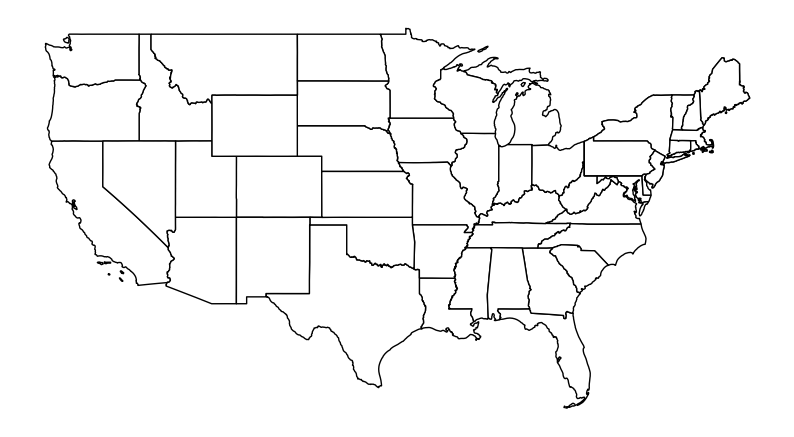

In [22]:
fig, ax = plt.subplots(figsize=(10,10))

state_bound.plot(facecolor='white',edgecolor='black', ax=ax)

# turning off the axis
plt.axis("equal")
ax.set_axis_off()
plt.show()

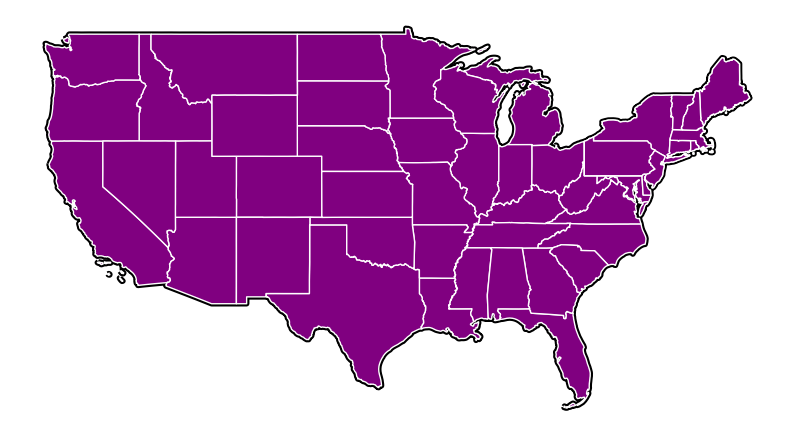

In [27]:
# add a boundary layer to the basemap
usa_bound = gpd.read_file('C:/Users/Juliance/Desktop/Earth_DS/spatial-vector-lidar/usa/usa-boundary-dissolved.shp')

f,ax = plt.subplots(figsize=(10,10))

usa_bound.plot(
    alpha=1,
    color='white',
    linewidth=4,
    edgecolor='black',
    ax=ax
)
state_bound.plot(
    edgecolor='white',
    ax=ax,
    color='purple',
    linewidth=1
)

# remove the axes
ax.set_axis_off()
plt.show()

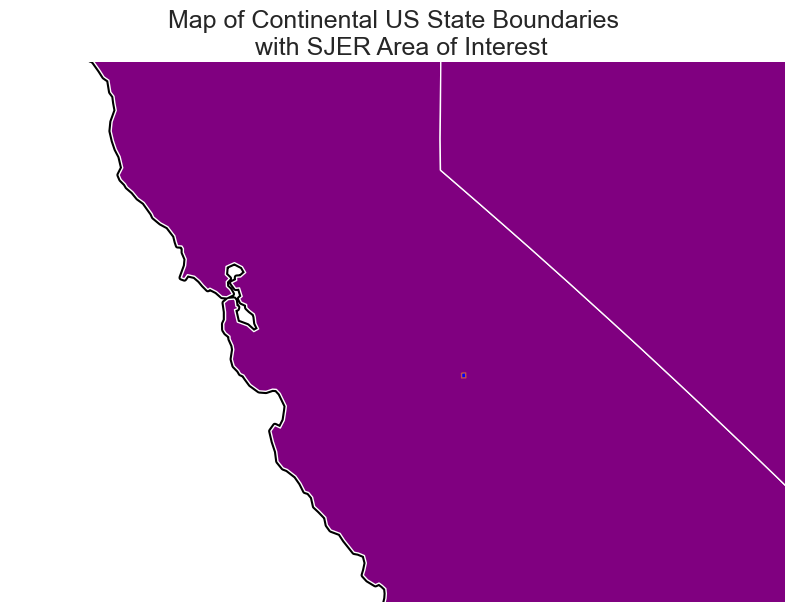

In [37]:
# adding the SJER study site location to the map
# take note of the class and CRS of each object
f,ax = plt.subplots(figsize=(10,10))

usa_bound.plot(
    alpha=1,
    color='white',
    linewidth=4,
    edgecolor='black',
    ax=ax
)
state_bound.plot(
    edgecolor='white',
    ax=ax,
    color='purple',
    linewidth=1
)

sjer_aoi_wgs.plot(
    color='blue',
    edgecolor="r",
    ax=ax
)

# zooming into the california area to see the study site
ax.set(title='Map of Continental US State Boundaries \n with SJER Area of Interest')
ax.set(xlim=[-125,-116],ylim=[35,40])

# remove the axes
ax.set_axis_off()
plt.show()

In [38]:
# convert the polygon to a polygon CENTROID (a point) and plot again. 
# data represented as a point can be changed such that the point size is made more visible.

aoi_point = sjer_aoi_wgs['geometry'].centroid

type(aoi_point)

C:\Users\Juliance\AppData\Local\Temp\ipykernel_2128\3710692846.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  aoi_point = sjer_aoi_wgs['geometry'].centroid


geopandas.geoseries.GeoSeries

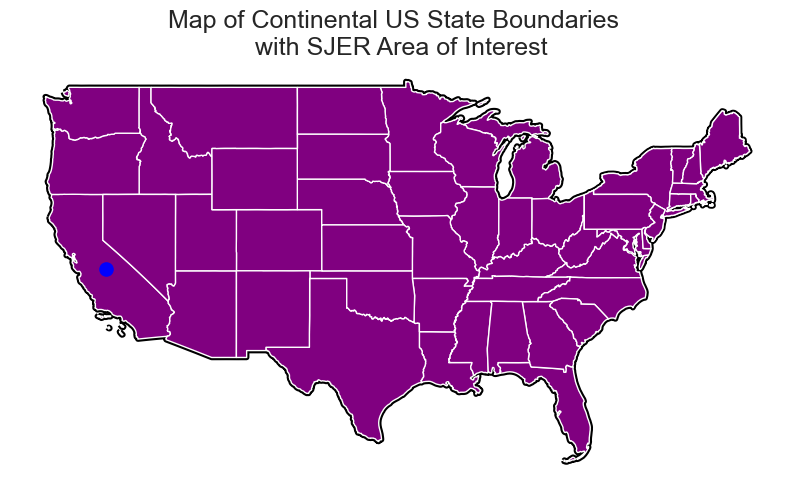

In [40]:
# plotting the point on the two base layers
f,ax = plt.subplots(figsize=(10,10))

usa_bound.plot(
    alpha=1,
    color='white',
    linewidth=4,
    edgecolor='black',
    ax=ax
)
state_bound.plot(
    edgecolor='white',
    ax=ax,
    color='purple',
    linewidth=1
)

aoi_point.plot(
    marker='o',
    markersize=90,
    color='blue',
    ax=ax
)

# zooming into the california area to see the study site
ax.set(title='Map of Continental US State Boundaries \n with SJER Area of Interest')


# remove the axes
ax.set_axis_off()
plt.show()

## Clip a spatial vector layer in Python using Shapely & GeoPandas: GIS in Python

Learning objectives are:- 
- Clip a spatial vector point and line layer to the spatial extent of a polygon layer in Python using geopandas.
- Plot data with custom legends.